In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# as per http://matplotlib.org/examples/pylab_examples/demo_annotation_box.html
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

%matplotlib inline

In [2]:
def add_image(instrument, labeldata):
    """
    Adds the tiny instrument image and 
    corresponding text label
    """
    
    img_file = labeldata.filename.values[0]
    text = labeldata.text1.values[0]
    # add second line if appropriate
    if isinstance(labeldata.text2.values[0], str):
        text = text + "\n" + labeldata.text2.values[0]

    xy = (labeldata.x, labeldata.y) # xy determines placement
    zoom = labeldata.zoom.values[0]  # zoom factor
    img_xybox_x = labeldata.img_xybox_x.values[0] # offset from xy for image
    img_xybox_y = labeldata.img_xybox_y.values[0]
    txt_xybox_x = labeldata.txt_xybox_x.values[0] # offset from xy for textlabel
    txt_xybox_y = labeldata.txt_xybox_y.values[0]

    # optional arrow to xy positions
    if labeldata.arrow.values[0]:
        arrow = dict(arrowstyle="<-")
    else:
        arrow = None

    arr_img = plt.imread("img/"+ img_file, format='png')

    imagebox = OffsetImage(arr_img, zoom=zoom)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        frameon = False,
                        xybox=(img_xybox_x, img_xybox_y), # places the instrument image at the exact x,y coordinates
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=arrow
                        )

    ax.add_artist(ab)

    # Annotate the 1st position with a text box
    offsetbox = TextArea(text, minimumdescent=False)
    ab = AnnotationBbox(offsetbox, xy,
                        frameon = False,
                        xybox=(txt_xybox_x, txt_xybox_y), # offset from xy position, e.g. (0, -20)
                        xycoords='data',
                        boxcoords="offset points",
                       )
    ax.add_artist(ab)


In [3]:
def add_license():
    """
    Adds the CC B image and 
    corresponding text
    """
    
    img_file = "by.png"
    xy = (19, 0.00002) # xy determines placement
    zoom = 0.2  # zoom factor    
    arr_img = plt.imread("img/"+ img_file, format='png')

    imagebox = OffsetImage(arr_img, zoom=zoom)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        frameon = False,
                        xybox=(0, 0), # places the instrument image at the exact x,y coordinates
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        )

    ax.add_artist(ab)

    # Annotate the 1st position with a text box
    offsetbox = TextArea("Lex Nederbragt (2012-2017)" + "\n" + "http://dx.doi.org/10.6084/m9.figshare.100940", minimumdescent=False)
    ab = AnnotationBbox(offsetbox, xy,
                        frameon = False,
                        xybox=(145, 0), # offset from xy position, e.g. (0, -20)
                        xycoords='data',
                        boxcoords="offset points",
    #                    arrowprops=dict(arrowstyle="->") # optional arrow to xy positions
                       )
    ax.add_artist(ab)


In [4]:
# Load the data
data = pd.read_table('developments_in_high_throughput_sequencing.tsv', sep ='\t')
data.head()

,Platform,Instrument,Label,Year,Reads per run,Read length (mode or average),Bases per run (gigabases),Source
0,ABI Sanger,3730xl,ABI Sanger 3730xl,2002,96,800,0.000077,0.0
1,454,GS20,454 GS FLX,2005,200000,100,0.020000,NaN
2,454,GS FLX,454 GS FLX,2007,400000,250,0.100000,NaN
3,454,GS FLX Titanium,454 GS FLX,2009,1000000,500,0.450000,NaN
4,454,GS FLX+,454 GS FLX,2011,1000000,700,0.700000,1.0


In [5]:
# Get a list of instruments
instruments = data.Label.unique()

In [6]:
instruments

array(['ABI Sanger 3730xl', '454 GS FLX', '454 GS Junior', 'Illumina GA',
       'Illumina HiSeq 2000/2500', 'Illumina HiSeq 2500 RR',
       'Illumina HiSeq 4000', 'Illumina HiSeq X', 'Illumina NextSeq 500',
       'Illumina MiSeq', 'Illumina MiniSeq', 'Illumina NovaSeq 6000',
       'SOLiD', 'IonTorrent PGM ', 'IonTorrent Proton',
       'IonTorrent S5/S5XL', 'PacBio RS', 'PacBio Sequel',
       'Oxford Nanopore MinION Mk1'], dtype=object)

In [7]:
# load data for adding images and text
def load_labeldata():
    labels = pd.read_table('labels.tsv', sep = '\t')
    return labels
load_labeldata().tail()

,instrument,text1,text2,x,y,zoom,img_xybox_x,img_xybox_y,txt_xybox_x,txt_xybox_y,arrow,color,filename
14,IonTorrent S5/S5XL,IonTorrent S5/S5XL,NaN,400,8.0,0.05,20,0,80,0,0,k,ion-s5.png
15,Oxford Nanopore MinION Mk1,Oxford Nanopore,MinION Mk1,5000,20.0,0.05,5,5,5,-15,0,r,Oxford_Nanopore_MinION_Mk1.png
16,PacBio RS,PacBio,RS,5000,0.6,0.10,0,5,0,-20,0,b,PacBio-System.PacBio-RS-II-machine-300x236.png
17,PacBio Sequel,PacBio,Sequel,18000,96.0,0.10,-21,18,-21,-12,0,g,PacBio-Sequel.png
18,SOLiD,SOLiD,NaN,25,1.0,0.10,0,70,0,50,0,r,solid.png


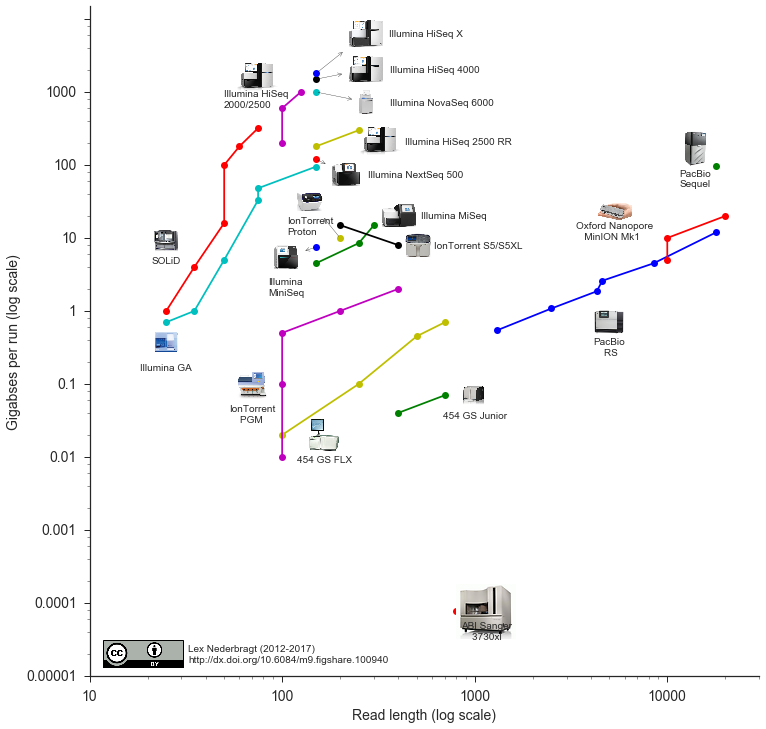

In [14]:
# load data
labels = load_labeldata()

# Set up the plot
sns.set_style("white")
sns.set_style("ticks")

plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1)
plt.xlabel('Read length (log scale)', fontsize=14)
plt.ylabel('Gigabses per run (log scale)', fontsize=14)

# Plot the data
for instrument in instruments:
    reads = data[data.Label == instrument]['Read length (mode or average)']
    bases = data[data.Label == instrument]['Bases per run (gigabases)']
    color = labels[labels.instrument == instrument].color.values[0]
    plt.plot(reads, bases, 'o-', label = instrument, color = color)

# Set scales, labels
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(10,30000)
plt.ylim(0.00001,15000)
ax.set_xticklabels(['1','10','100','1000','10000','100000'], fontsize=14) # Need to expand list to show the one I want
ax.set_yticklabels(['0.000001','0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000'], fontsize=14)

# Adjust border, remove right and top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Prepare legend box OUTSIDE of plot
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height])
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# add license info
add_license()

plt.savefig('developments_in_high_throughput_sequencing_bare.pdf', orientation='landscape')

# add images and text
for instrument in instruments:
    # plot label for each instrument where it is available
    labeldata = labels[labels.instrument == instrument]
    if len(labeldata):
        add_image(instrument, labeldata)

# finish
plt.savefig('developments_in_high_throughput_sequencing.pdf', orientation='landscape')
plt.savefig('developments_in_high_throughput_sequencing.png', dpi = 200)
plt.show()